# Introduction to Exploratory Data Analysis

... one of the most important steps of the Data Science pipeline

About the Dataset:
The dataset we will be using here is the Wine Quality data, containing certain information about red and white wine.

Quality of the wine is based on scores given by wine experts where each graded wine between 0 (very bad) and 10 (very excellent). Then, the median of at least 3 evaluations was taken as the final quality score.

This popular dataset is commonly used for predicting whether a particular wine is “good quality” or not.

In [1]:
import numpy as np # Fundamental package for linear algebra and multidimensional arrays
import pandas as pd # Data analysis and manipulation tool

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# In read_csv() function, we have passed the location of the CSV file.
# The data is separated by ';' instead of ','- the default separator of CSV so we used separator as ';' (sep = ";")
red_wine_data = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Wine_Dataset/winequality-red.csv", sep=";")

In [3]:
red_wine_data.head() # we can also pass the number of records we want in the brackets (). By default it displays first 5 records.

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
red_wine_data.shape

(1599, 12)

# Get a Statistical Overview using: describe()

In [5]:
red_wine_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Let's explore different statistical measures that we have got from describe().
count: total count of non-null values in the column
mean: the average of all the values in that column
min: the minimum value in the column
max: the maximum value in the column
25%: first quartile in the column after we arrange those values in ascending order
50%: this is the median or the second quartile
75%: the third quartile
std: this is the standard deviation (i.e. measure of depreciation, you must have read in the basics of statistics study material)

Observations about outliers:

Here as you can notice the mean value is less than the median value of each column. Median is represented by 50%(50th percentile) in the index column. This signifies the presence of Outliers.

For example, a data set includes the values: 30, 31, 32, and 2. The mean value (23.75), which is lower than the median of the data(30.5), is greatly affected by the extreme data point(2).

There is notably a large difference between 75th %tile and max values of input variables “residual sugar”, ” free sulfur dioxide”, ” total sulfur dioxide”. This indicates that some values of these 3 variables lie much farther from the general range of values(upto 75th %tile)
Thus, the observations 1 and 2 suggest that there are extreme values i.e Outliers in our dataset.

# Exploring the Features/ Variables

In [6]:
red_wine_data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Unique values of Target Variable

In [7]:
red_wine_data['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

Observations about Target Variable: Few key insights just by looking at the target variable are as follows

Target variable/Dependent variable is discrete and categorical in nature.
“quality” score scale ranges from 1 to 10;where 1 being poor and 10 being the best.
1,2,9 & 10 Quality ratings are not given by any observation. Only scores obtained are between 3 to 8.

In [8]:
red_wine_data['quality'].value_counts()       #Frequency Counts of each Quality Value

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [9]:
red_wine_data.rename(columns={'fixed acidity': 'fixed_acidity', 'citric acid':'citric_acid', 'volatile acidity':'volatile_acidity',
'residual sugar':'residual_sugar', 'free sulfur dioxide':'free_sulfur_dioxide',
'total sulfur dioxide':'total_sulfur_dioxide'},
inplace = True)


# inplace = True makes changes in the dataframe itself

In [10]:
# Let's see our data with new column names
red_wine_data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Check for Missing Values

Handling missing values is an essential part of the data cleaning and preparation process because almost all data in real life comes with some missing values.

Pandas provides isnull(), isna() functions to detect missing values. Both of them do the same thing.

df.isna() returns the dataframe with boolean values indicating missing values.

You can also choose to use notna() which is just the opposite of isna().

df.isna().any() returns a boolean value for each column. If there is at least one missing value in that column, the result is True.

df.isna().sum() returns the number of missing values in each column.

In [11]:
red_wine_data.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Observation:

There is no missing value in any column

# info()

df.info(): return information about the data frame including the data types of each column, number of null values in each column and memory usage of the entire data.

In [13]:
# concise summary about dataset
red_wine_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Observations:

The data has only float and integer values.
There are no missing values

# Check for Duplicates

In [14]:
duplicate_entries = red_wine_data[red_wine_data.duplicated()]
duplicate_entries.shape

(240, 12)

Observations:

There are 240 duplicates. The quality ratings for the same/similar wine were given by different wine tasters so there is a possibility of similar reviews. We can thus keep these duplicates.

# Separating input and target variables

In [16]:
y = red_wine_data.quality # set 'quality' as target vaiable(y)
X = red_wine_data.drop('quality', axis=1) # all columns except quality are input variables(X)

X as input variables now contains all the features except Quality.

y as target contains Quality

# Graphical Techniques ( Data Visualization)

In [15]:
# importing data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram

Histograms use bars to visualize data as well. Many people may not even realize there is a difference between a histogram and a bar chart. They practically look the same from a distance.

The key is that a histogram looks solely at quantitative variables while a bar chart looks at categorical variables. That’s why the bars in a histogram are typically grouped together without spacing in between the bars.

Calling the hist() method on a pandas DataFrame will return histograms for all series in the DataFrame

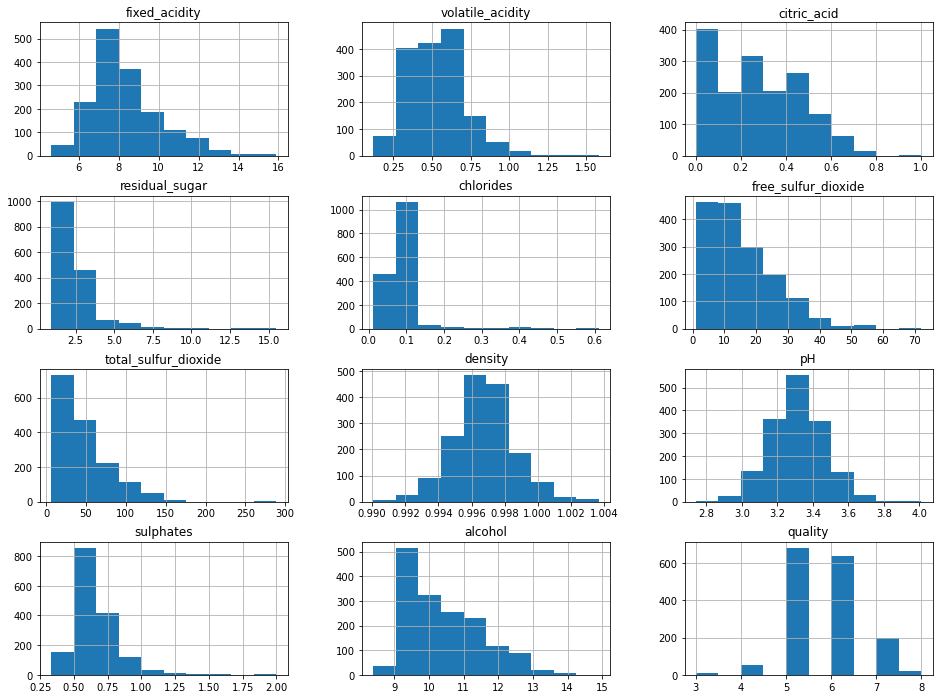

In [17]:
red_wine_data.hist(bins=10, figsize=(16,12))
plt.show()

Observations:

The distribution of the attribute “alcohol” seems to be positively skewed.
The attributes 'density' and 'pH' are quite normally distributed.
Now looking at the attribute quality, we can observe that the wines with average quality (i.e. quality rating 5 to 7) are more than wines with bad(1-4) or good(8-10) quality.

# Correlation Matrix with Heatmap

Correlation:
Correlation is a statistical measure. Data correlation is a way to understand the relationship between multiple values or features in your dataset.

Every single successful data science project revolves around finding accurate correlations between the input and target variables. However more than often, we oversee how crucial correlation analysis is.

It is recommended to perform correlation analysis before and after data gathering and transformation phases of a data science project.

Positive Correlation: Two features (variables) can be positively correlated with each other. It means that when the value of one variable increases then the value of the other variable(s) also increases (also decreases when the other decreases). Eg. The more time you spend running on a treadmill, the more calories you will burn.

Negative Correlation: Two features (variables) can be negatively correlated with each other. This occurs when the value of one variable increases and the value of another variable(s) decreases (inversely proportional). Eg. As the weather gets colder, air conditioning costs decrease.

No Correlation: Two features might not have any relationship with each other. This happens when the value of a variable is changed then the value of the other variable is not impacted. Eg. There is no relationship between the amount of tea drunk and level of intelligence.
Each of these correlation types exists in a spectrum represented by values from -1 to +1 where slight or high positive correlation features can be like 0.7.

A very strong and perfect positive correlation is represented by a correlation score of 0.9 or 1.

If there is a strong negative correlation, it will be represented by a value of -0.9 or -1. Values close to zero indicates no correlation.

We can check how each features are related with others using corr() function.

In [18]:
red_wine_data.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

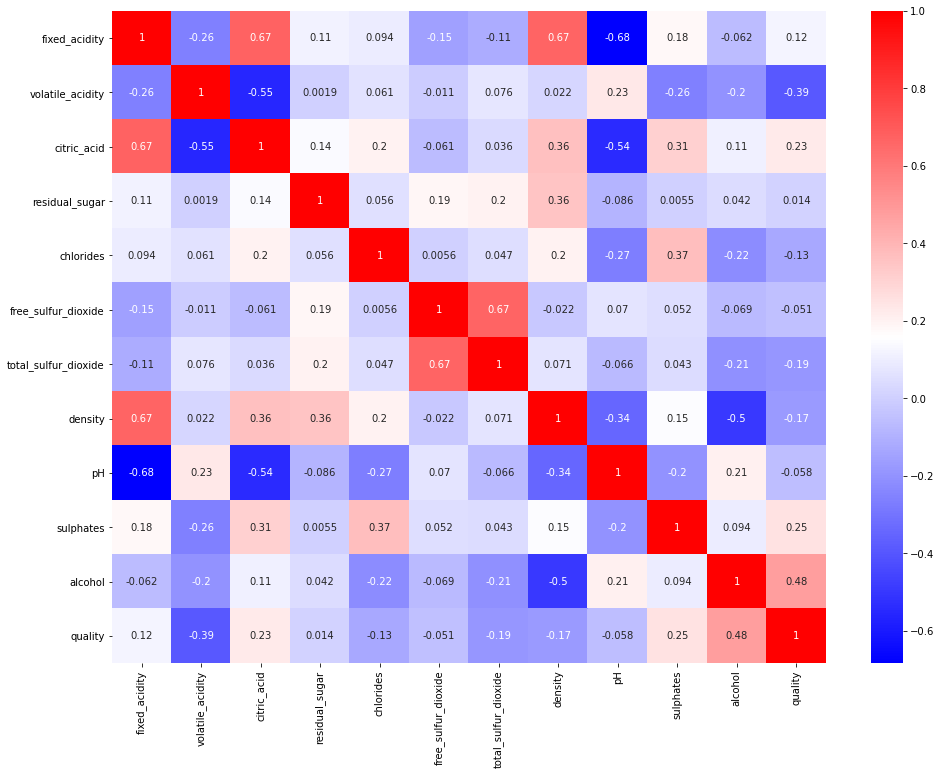

In [19]:
plt.figure(figsize=(16, 12))
sns.heatmap(red_wine_data.corr(), cmap='bwr', annot=True) # annot = True: to display the correlation value in the graph


Observations:

Alcohol has the highest positive correlation with wine quality, followed by the various other variablesacidity, sulphates, density & chlorides.
There is a relatively high positive correlation between fixed_acidity and citric_acid, fixed_acidity and density.
There is a relatively high negative correlation between fixed_acidity and pH.
Density has a strong positive correlation with fixed_acidity, whereas it has a strong negative correlation with alcohol.
citric acid & volatile acidity have negative correlation.
free sulphur dioxide & total sulphur dioxide have positive correlation.

# Count Plot

Count plot is a graphical display to show the number of occurrences or frequency for each categorical data using bars.

<AxesSubplot:xlabel='quality', ylabel='count'>

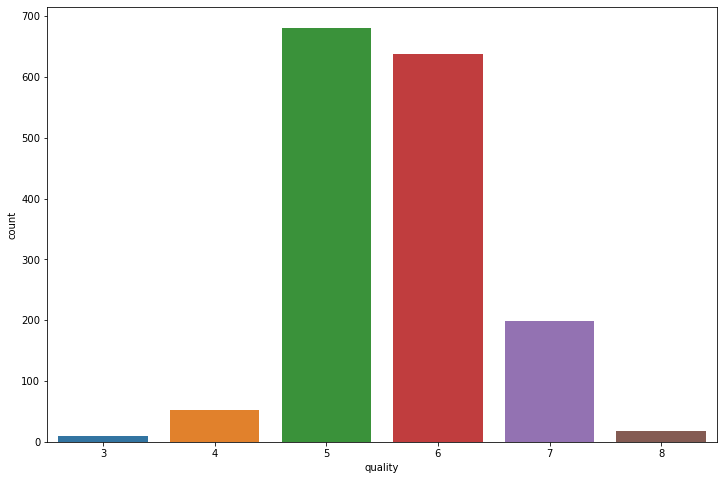

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(red_wine_data.quality)

Observation:

The average(5-7) quality of wines are more than good(1-4) and bad(8-10) quality of wines.

# Pair Plot

The pair plot builds on two basic figures, the histogram and the scatter plot. Looking at the below image, we see that the histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

It plots every numerical attribute against every other.

pairplot of seaborn helps to achieve this

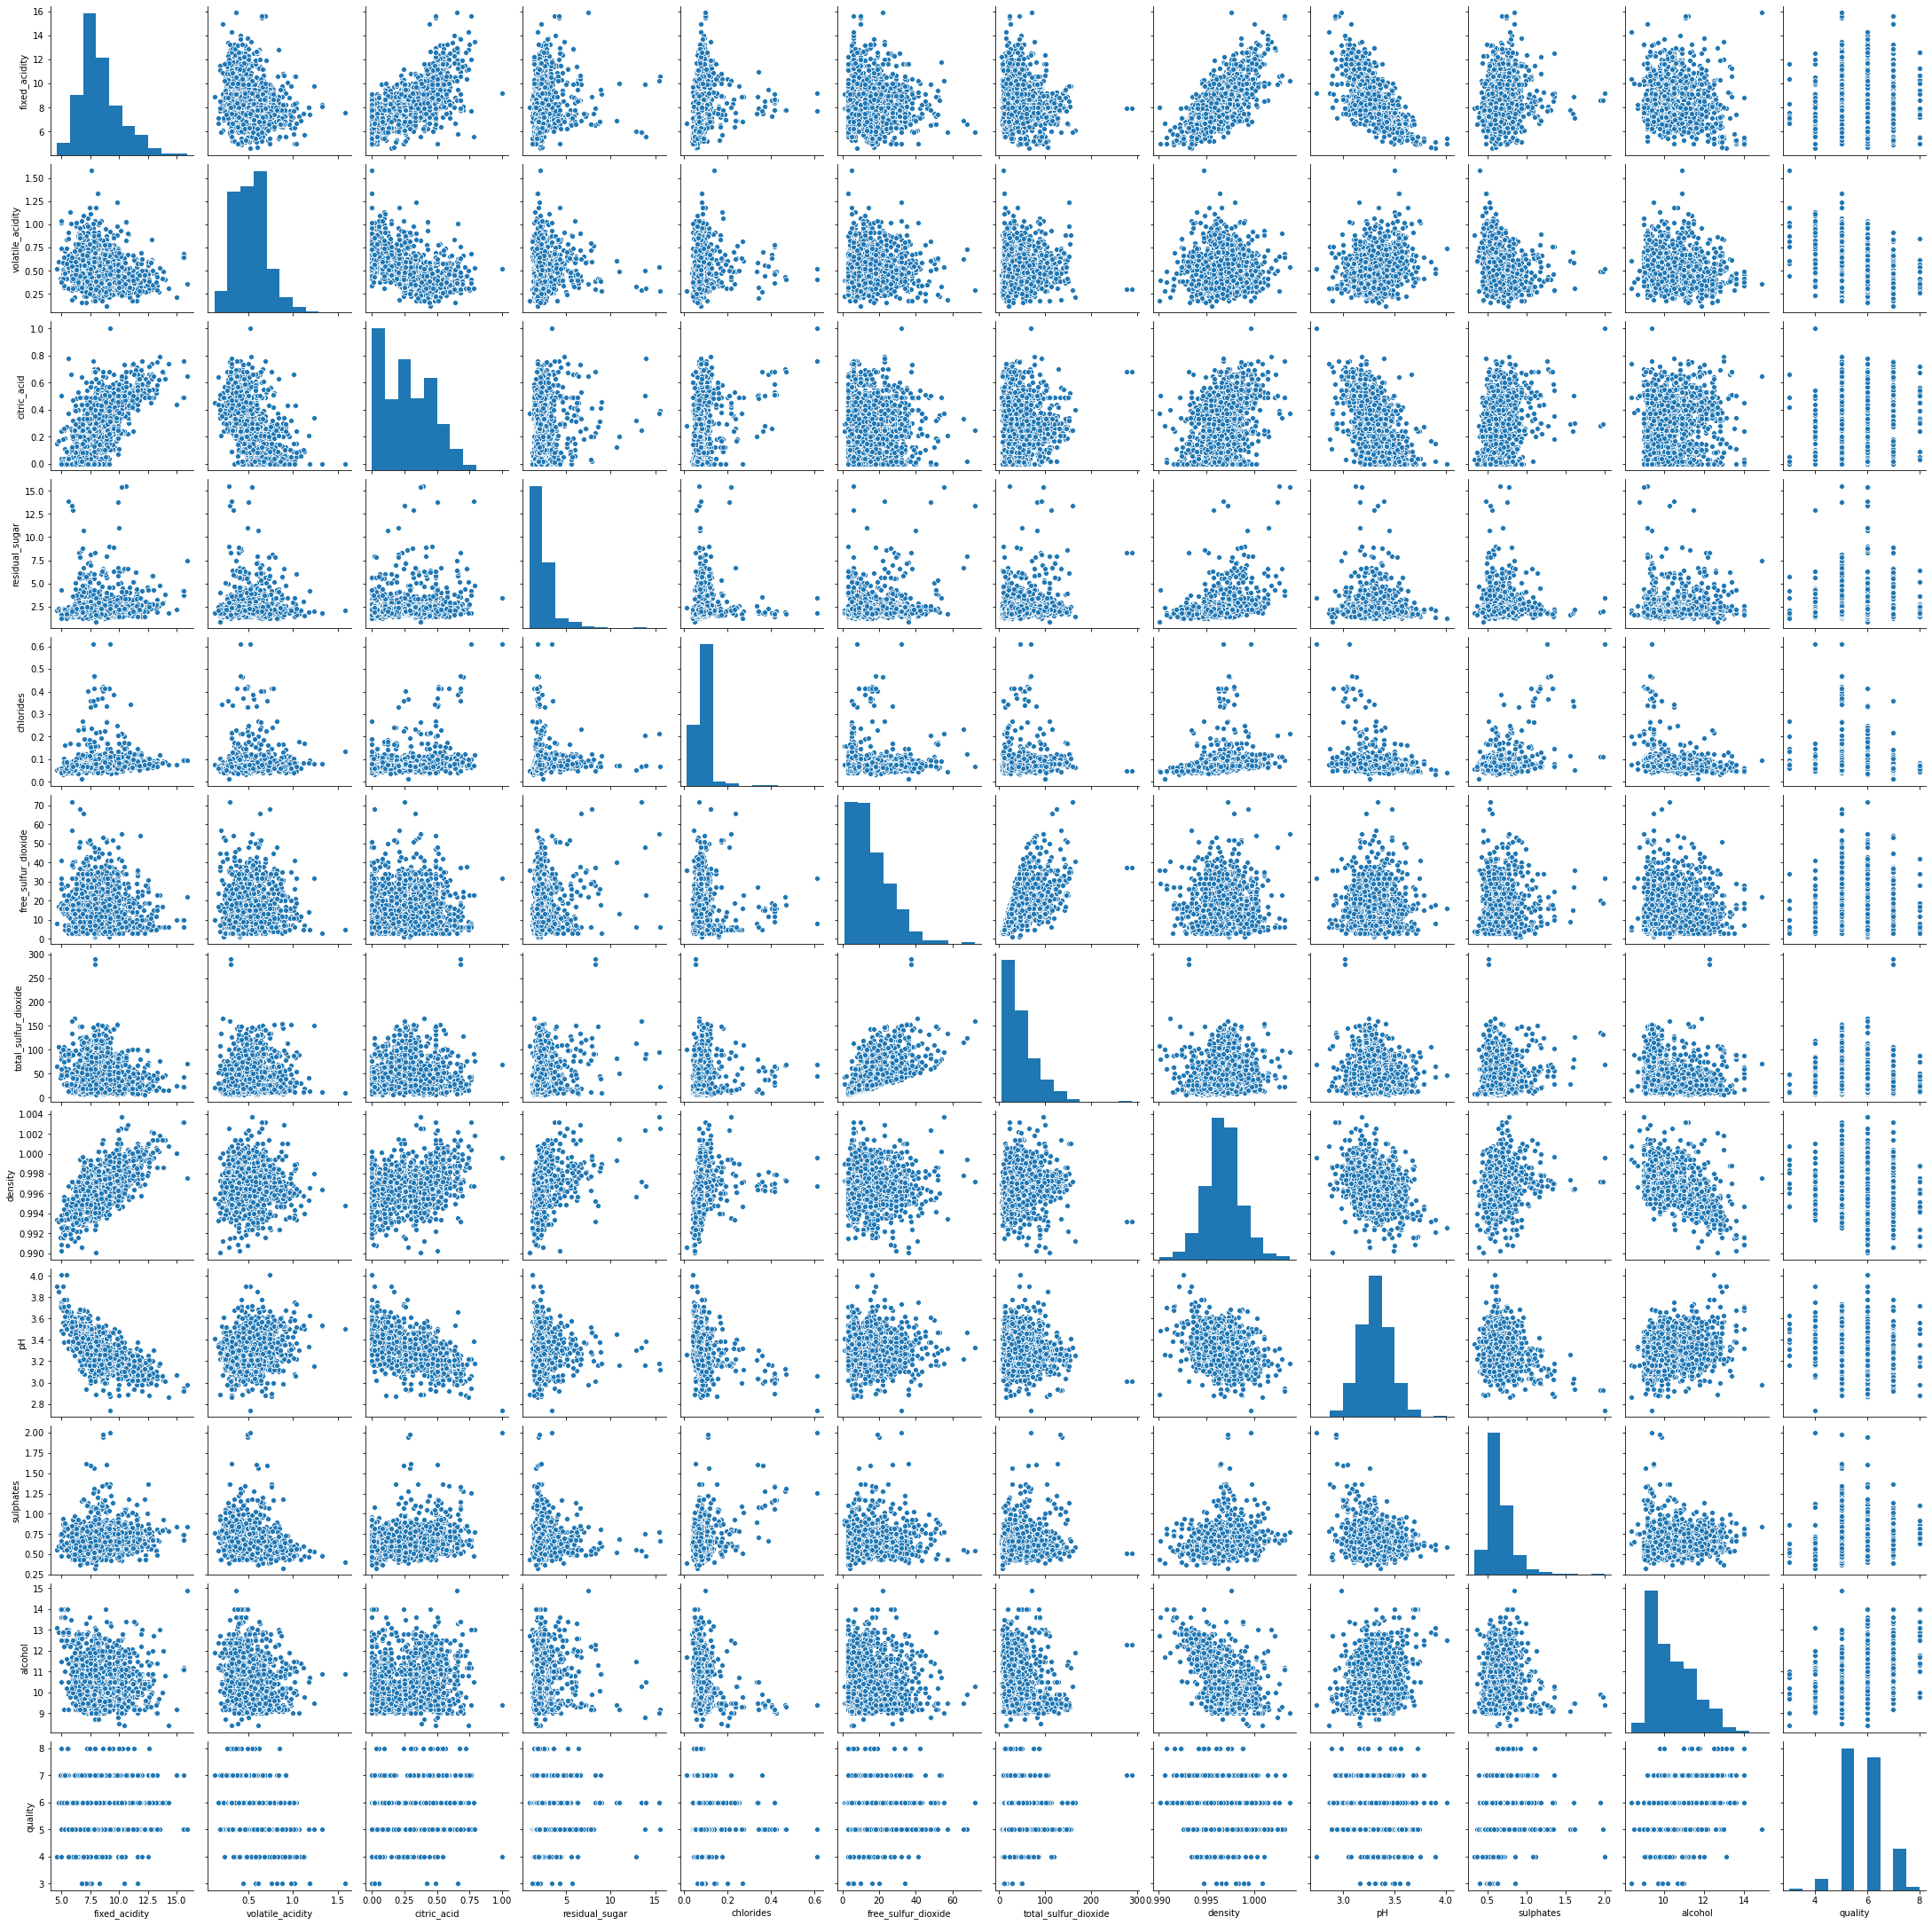

In [21]:
sns.pairplot(red_wine_data)

Observation:

The correlation between fixed_acidity and citric_acid is 0.67 (you could find this value under the correlation matrix topic). Looking at scatterplot for this pair of variables, we can see the positive linear correlation between these two variables. We can observe the upward trend, and also the points are not too dispersed.

# Box Plot

A box plot is a great way to get a visual sense of an entire range of data. It can tell you about your outliers and what their values are. It can also tell you if your data is symmetrical, how tightly your data is grouped, and if and how your data is skewed.

Box plots divides data into its quartiles. The “box” shows a user the data set between the first and third quartiles.

The median gets drawn somewhere inside the box and then you see the most extreme non-outliers to finish the plot. Those lines are known as the “whiskers”. If there are any outliers then those can be plotted as well.

With box plots you can answer how diverse or uniform your data might be. You can identify what is normal and what is extreme. Box plots help give a shape to your data that is broad without sacrificing the ability to look at any piece and ask more questions.

It displays the five-number summary of a set of data. The five-number summary is:

minimum
first quartile (Q1)
median
third quartile (Q3)
maximum

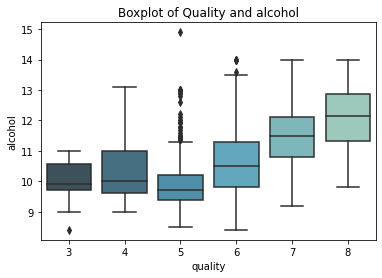

In [22]:
sns.boxplot(y,red_wine_data['alcohol'],palette='GnBu_d')
plt.title("Boxplot of Quality and alcohol")
plt.show()

Observation:

The above plot shows the increase in the quality of wine with the increase in alcohol. The quality of the wine is directly related to the amount of alcohol in the wine. More the alcohol in the wine, the better will be the quality.

Also, the points lying outside the whiskers(the lines extending from the rectangular box) are the outliers.

# Final Notes


The number of visualisations you can create and the number of inferences you can derive are endless.

The knowledge of which EDA techniques will be helpful in obtaining cruicial information for a particular dataset will only come with practice.